In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
# Load Fashion MNIST data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize the pixel values to range [0, 1]
X_train, X_test = X_train / 255.0, X_test / 255.0

# Add channel dimension (28x28 → 28x28x1)
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# Define class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),  # ✅ Recommended way to define input
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for Fashion MNIST
])


In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stop])


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 27ms/step - accuracy: 0.7782 - loss: 0.6061 - val_accuracy: 0.8722 - val_loss: 0.3519
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.8857 - loss: 0.3092 - val_accuracy: 0.8900 - val_loss: 0.3060
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 27ms/step - accuracy: 0.9030 - loss: 0.2592 - val_accuracy: 0.8907 - val_loss: 0.2971
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.9187 - loss: 0.2178 - val_accuracy: 0.9062 - val_loss: 0.2561
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9266 - loss: 0.1956 - val_accuracy: 0.9129 - val_loss: 0.2493
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - accuracy: 0.9359 - loss: 0.1726 - val_accuracy: 0.9138 - val_loss: 0.2444
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 28ms/step - accuracy: 0.9409 - loss: 0.1553 - val_accuracy: 0.9111 - val_loss: 0.2673
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 27ms/step - accuracy: 0.9502 -

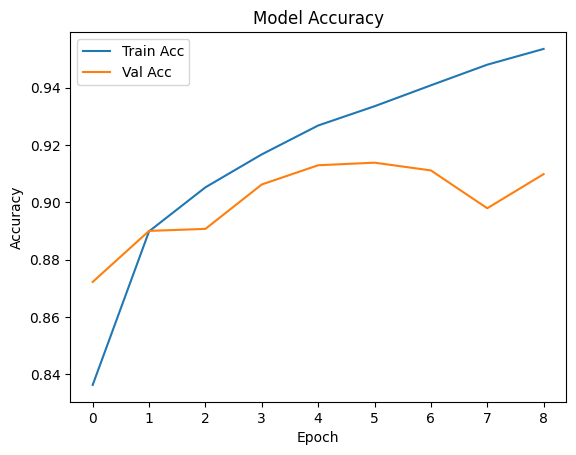

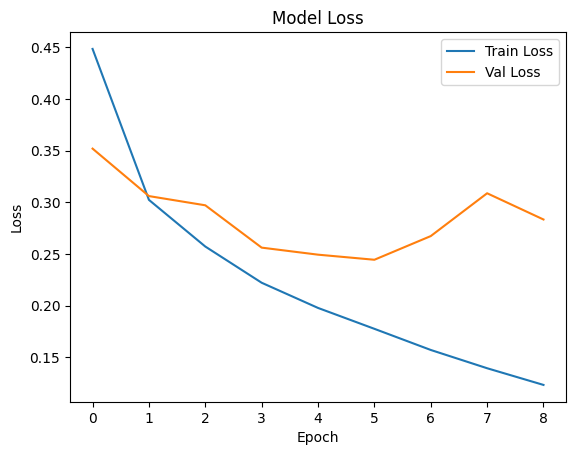

In [7]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


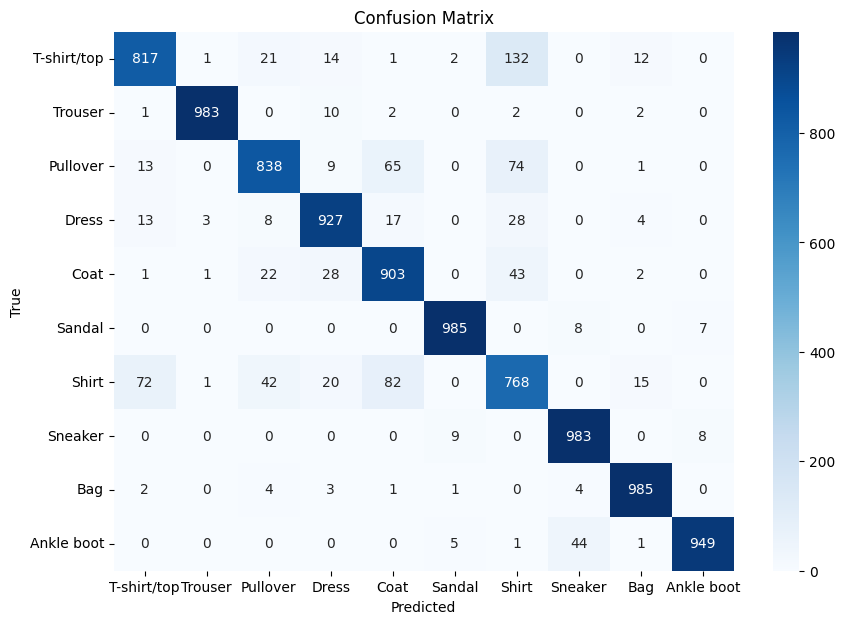

In [8]:
y_pred = np.argmax(model.predict(X_test), axis=1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [9]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=class_names))


Classification Report:

              precision    recall  f1-score   support

 T-shirt/top       0.89      0.82      0.85      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.90      0.84      0.87      1000
       Dress       0.92      0.93      0.92      1000
        Coat       0.84      0.90      0.87      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.73      0.77      0.75      1000
     Sneaker       0.95      0.98      0.96      1000
         Bag       0.96      0.98      0.97      1000
  Ankle boot       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



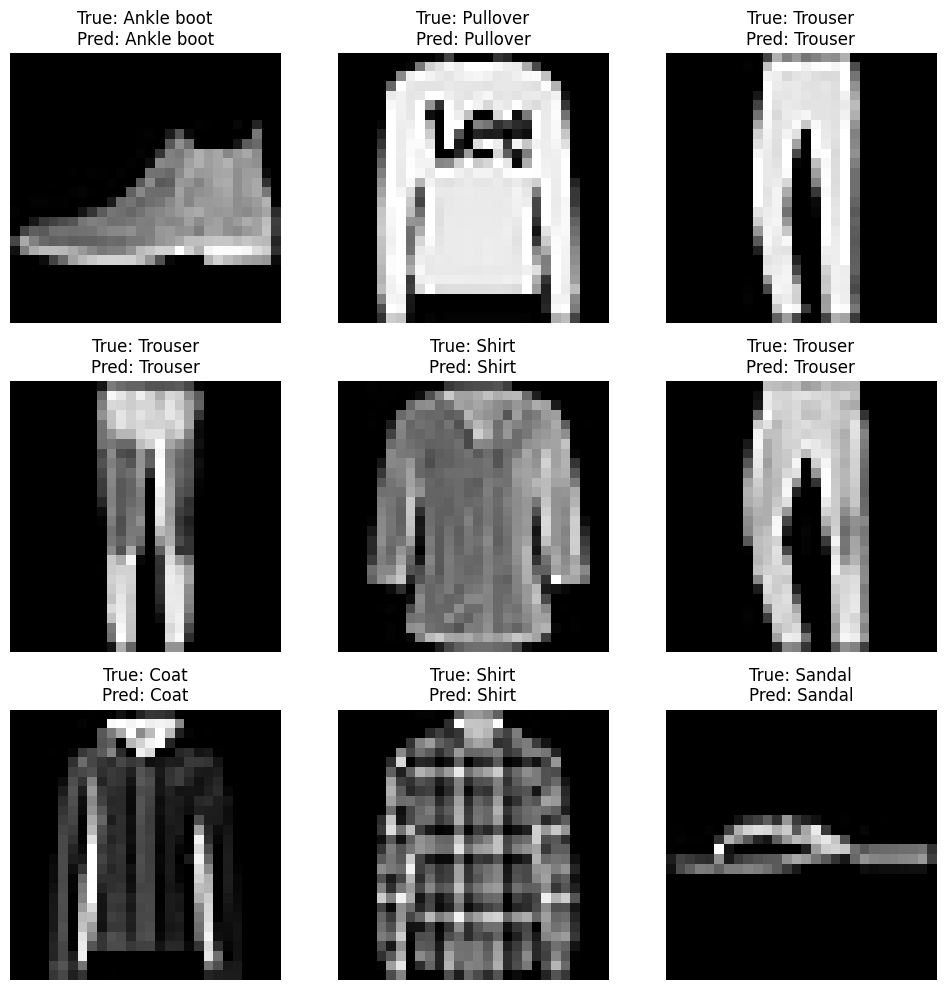

In [10]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(f"True: {class_names[y_test[i]]}\nPred: {class_names[y_pred[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
